In [20]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('BTCUSD_2021.csv')

df['date'] = pd.to_datetime(df.index)

df.head()

,date,low,high,open,close,volume
0,1970-01-01 00:00:00.000000000,28965.01,29015.49,28978.66,29015.49,1.030971
1,1970-01-01 00:00:00.000000001,29012.96,29050.52,29014.55,29049.52,2.104348
2,1970-01-01 00:00:00.000000002,29040.69,29050.52,29049.05,29040.69,0.141871
3,1970-01-01 00:00:00.000000003,29021.26,29041.70,29040.45,29040.57,0.039191
4,1970-01-01 00:00:00.000000004,29020.39,29040.57,29034.12,29031.48,1.927880


In [21]:
cluster_cols = ['low','high','open','close','volume']

X = df[cluster_cols]

In [22]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

pipe_km = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))
                          ,('scale', MinMaxScaler())
                          ,('clst', KMeans(random_state=0))])

pipe_km.steps

[('impute', SimpleImputer()),
 ('scale', MinMaxScaler()),
 ('clst', KMeans(random_state=0))]

In [23]:
from sklearn.cluster import KMeans

def determineClusters(pipe, X, range_min, range_max):
    Sum_of_squared_distances = []
    K = range(range_min, range_max)
    for k in K:
        pipe.set_params(clst__n_clusters=k)
        km=pipe.fit(X)
        Sum_of_squared_distances.append(km.named_steps.clst.inertia_)
        
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

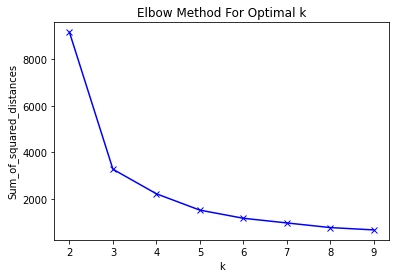

In [25]:
determineClusters(pipe_km, X, 2, 10)

In [26]:
from sklearn.cluster import KMeans

kmeans = pipe_km.set_params(clst__n_clusters=3).fit(X)

print('Sum of Squared Distance', kmeans.named_steps.clst.inertia_)

Sum of Squared Distance 3273.885087914405


In [27]:
df['kcluster'] = pd.Categorical(kmeans.named_steps.clst.labels_)

In [28]:
df.kcluster.value_counts()

1    59918
0    55279
2    38921
Name: kcluster, dtype: int64

In [29]:
pd.DataFrame(kmeans.named_steps.clst.cluster_centers_, columns=cluster_cols)

,low,high,open,close,volume
0,0.192586,0.181461,0.188175,0.187705,0.023309
1,0.813499,0.810257,0.815764,0.812678,0.014079
2,0.562651,0.556217,0.561443,0.559929,0.020873


In [30]:
scaler = kmeans.named_steps.scale

pd.DataFrame(scaler.inverse_transform(kmeans.named_steps.clst.cluster_centers_), columns=cluster_cols)

,low,high,open,close,volume
0,35023.925971,35088.150746,35046.386835,35052.886404,1.059728
1,57992.111804,58041.038835,57996.650215,58010.041073,0.640114
2,48712.998342,48767.856497,48696.414033,48725.805292,0.948960


In [31]:
df.groupby('kcluster')[cluster_cols].mean()

,low,high,open,close,volume
kcluster,,,,,
0,35023.184998,35087.405490,35045.640476,35052.142476,1.059553
1,57983.068549,58032.067828,57987.645948,58001.040409,0.641365
2,48697.968494,48752.740783,48681.274336,48710.701166,0.948228


In [32]:
df.groupby('kcluster')[cluster_cols].median()

,low,high,open,close,volume
kcluster,,,,,
0,34728.160,34803.000,34759.660,34760.850,0.444386
1,57878.695,57922.805,57880.015,57893.285,0.257995
2,48599.340,48650.000,48592.200,48615.510,0.410164


In [33]:
df.groupby('kcluster')[['close']].mean()

,close
kcluster,
0,35052.142476
1,58001.040409
2,48710.701166


In [35]:
df.groupby('kcluster')[['high']].mean()

,high
kcluster,
0,35087.405490
1,58032.067828
2,48752.740783
